# DEVICE CLASSIFIER ALL COLUMNS

## Imports and Read data

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import random

In [2]:
column_types = {'device_model': 'str'}
df_access = pd.read_csv('access_point.csv', dtype=column_types)
df_doorbell = pd.read_csv('doorbell.csv', dtype=column_types)
df_laptop_7400 = pd.read_csv('laptop_7400.csv', dtype=column_types)
df_laptop_e64 = pd.read_csv('laptop_e64.csv', dtype=column_types)
df_lightbulb = pd.read_csv('lightbulb.csv', dtype=column_types)
df_samsung_web = pd.read_csv('samsung_web.csv', dtype=column_types)
df_smartphone_4 = pd.read_csv('smartphone_4.csv', dtype=column_types)
df_smartphone_5 = pd.read_csv('smartphone_5.csv', dtype=column_types)
df_socket = pd.read_csv('socket.csv', dtype=column_types)
df_speaker = pd.read_csv('speaker.csv', dtype=column_types)
df_streamer = pd.read_csv('streamer.csv', dtype=column_types)
df_webcam = pd.read_csv('webcam.csv', dtype=column_types)

df_2 = pd.concat([df_samsung_web, df_access, df_doorbell, df_laptop_7400, df_laptop_e64, df_lightbulb, df_smartphone_4, df_smartphone_5, df_socket, df_speaker, df_streamer, df_webcam], ignore_index=True)

nocolumns = ['IPV4_SRC_ADDR', 'MAC', 'IPV4_DST_ADDR', 'IP', 'partition', 'category', 'type', 'date']

df = df_2.drop(nocolumns, axis=1)
df

,FIRST_SWITCHED,IN_BYTES,IN_PKTS,L4_DST_PORT,L4_SRC_PORT,LAST_SWITCHED,PROTOCOL,SRC_TOS,TCP_FLAGS,DURATION,device_model,SRC_AS,DST_AS,INPUT_SNMP,OUTPUT_SNMP,inter_arrival_time
0,1.579047e+09,240.0,4.0,5222.0,3696.0,1.579043e+09,6.0,0.0,2.0,4195.0,webcam.Samsung.SNH-1011N,0.0,0.0,6.0,1.0,1.579048e+09
1,1.579047e+09,76.0,1.0,123.0,4039.0,1.579043e+09,17.0,0.0,0.0,4216.0,webcam.Samsung.SNH-1011N,0.0,0.0,6.0,1.0,2.100000e+01
2,1.579047e+09,120.0,2.0,5222.0,3661.0,1.579043e+09,6.0,0.0,2.0,4213.0,webcam.Samsung.SNH-1011N,0.0,0.0,6.0,1.0,1.000000e+01
3,1.579047e+09,76.0,1.0,123.0,4040.0,1.579043e+09,17.0,0.0,0.0,4217.0,webcam.Samsung.SNH-1011N,0.0,0.0,6.0,1.0,2.000000e+01
4,1.579047e+09,60.0,1.0,5222.0,3661.0,1.579043e+09,6.0,0.0,2.0,4216.0,webcam.Samsung.SNH-1011N,0.0,0.0,6.0,1.0,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782639,1.580644e+09,1716.0,6.0,8800.0,47219.0,1.580639e+09,17.0,0.0,0.0,4234.0,webcam.Amcrest.IPM-721W,0.0,0.0,6.0,1.0,9.000000e+00
782640,1.580644e+09,240.0,4.0,12367.0,35031.0,1.580639e+09,6.0,0.0,2.0,4230.0,webcam.Amcrest.IPM-721W,0.0,0.0,6.0,1.0,1.100000e+01
782641,1.580644e+09,1722.0,6.0,8800.0,55222.0,1.580639e+09,17.0,0.0,0.0,4235.0,webcam.Amcrest.IPM-721W,0.0,0.0,6.0,1.0,1.000000e+00
782642,1.580644e+09,1239.0,21.0,8800.0,19272.0,1.580639e+09,17.0,0.0,0.0,4191.0,webcam.Amcrest.IPM-721W,0.0,0.0,6.0,1.0,8.000000e+00


In [3]:
df.isnull().sum()

FIRST_SWITCHED        0
IN_BYTES              0
IN_PKTS               0
L4_DST_PORT           0
L4_SRC_PORT           0
LAST_SWITCHED         0
PROTOCOL              0
SRC_TOS               0
TCP_FLAGS             0
DURATION              0
device_model          0
SRC_AS                0
DST_AS                0
INPUT_SNMP            0
OUTPUT_SNMP           0
inter_arrival_time    0
dtype: int64

In [4]:
df['device_model'].value_counts()

webcam.Amcrest.IPM-721W             239746
socket.Wemo.Insight                 169801
webcam.Samsung.SNH-1011N            108948
streamer.Amazon.Fire_TV_Stick        81143
smartphone.Samsung.Galaxy_Note_4     55626
light_bulb.TP_Link.LB130             51383
speaker.Sonos.One                    39240
laptop.Dell.Latitude_E6430           11627
doorbell.Amazon.Ring                  8590
smartphone.Samsung.Galaxy_Note_5      7501
access_point.TP_Link.TL-WA901ND       6607
laptop.Dell.Latitude_7400             2432
Name: device_model, dtype: int64

In [5]:
df.shape

(782644, 16)

In [6]:
X = df.drop(columns='device_model', axis=1)
Y = df['device_model']
Y

0         webcam.Samsung.SNH-1011N
1         webcam.Samsung.SNH-1011N
2         webcam.Samsung.SNH-1011N
3         webcam.Samsung.SNH-1011N
4         webcam.Samsung.SNH-1011N
                    ...           
782639     webcam.Amcrest.IPM-721W
782640     webcam.Amcrest.IPM-721W
782641     webcam.Amcrest.IPM-721W
782642     webcam.Amcrest.IPM-721W
782643     webcam.Amcrest.IPM-721W
Name: device_model, Length: 782644, dtype: object

## Bagging Classifier

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(X_train, y_train)
predictions = cls.predict(X_test)
cls.score(X_test, y_test)

0.9889247218403259

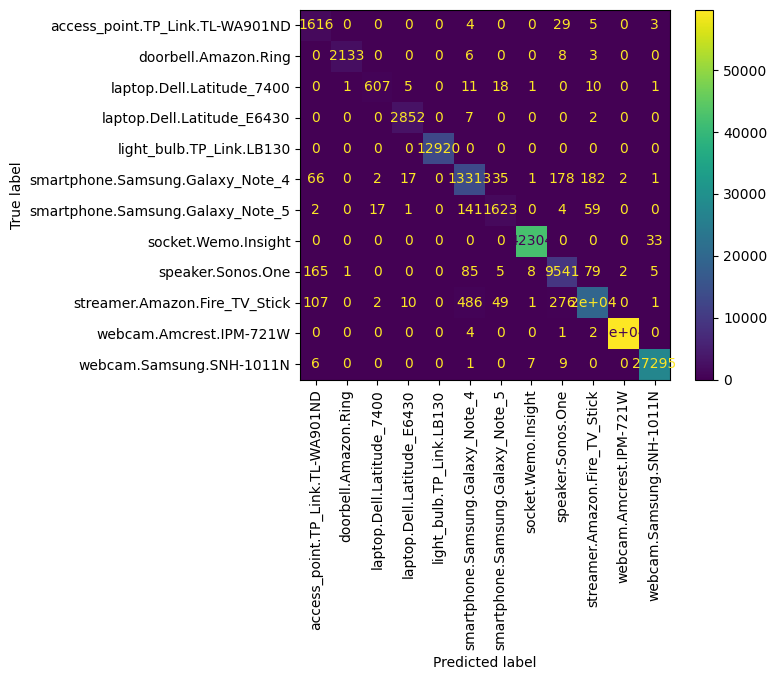

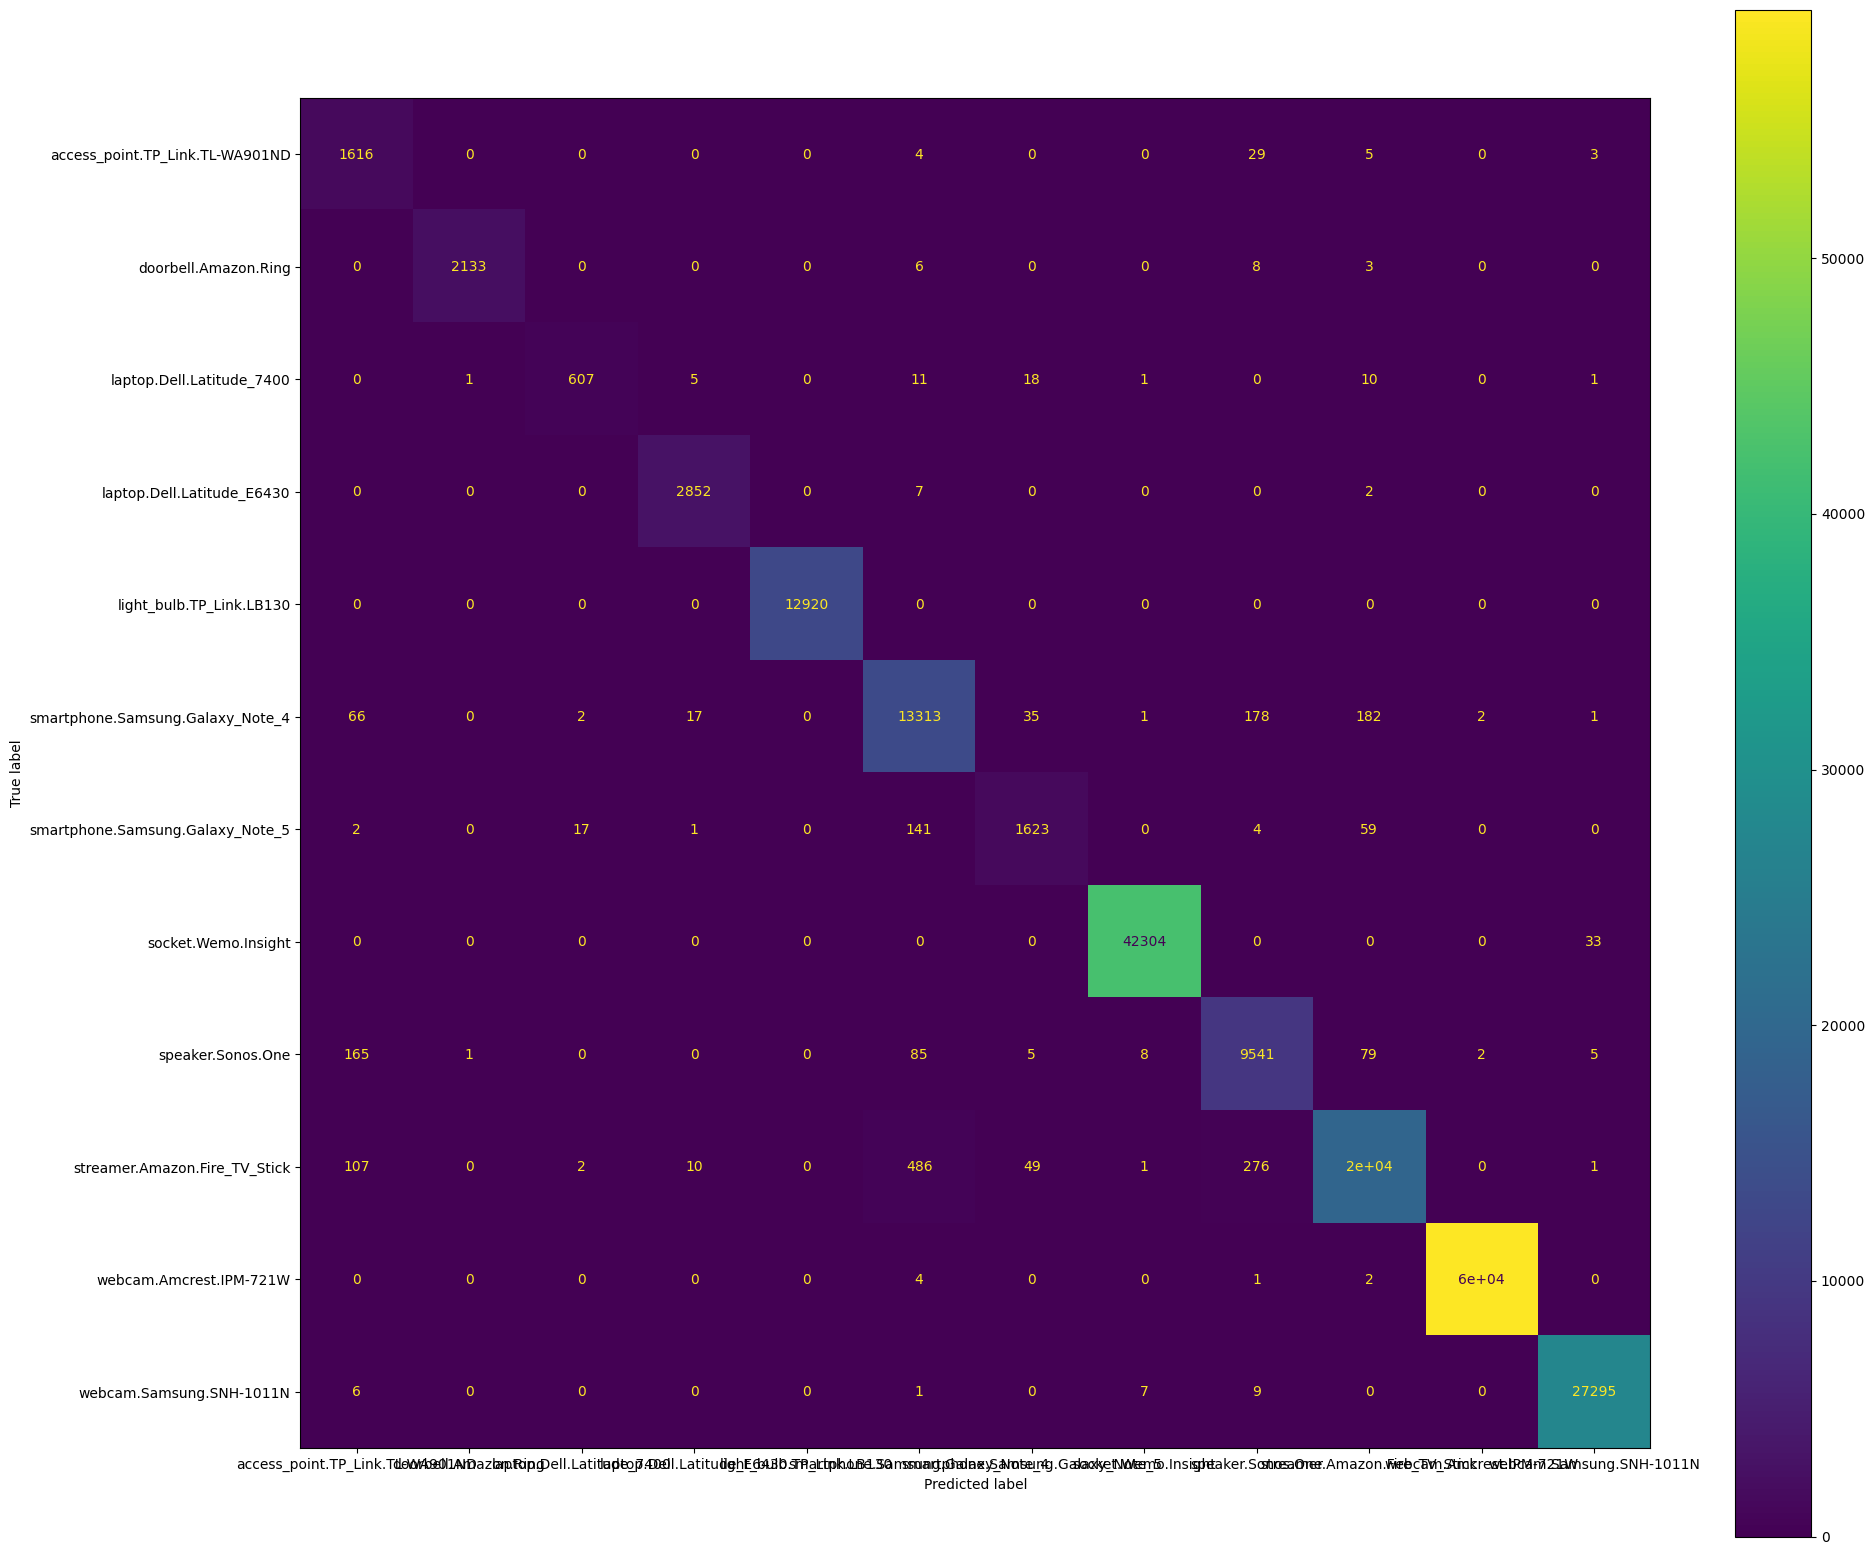

In [8]:
conf_matrix_display = ConfusionMatrixDisplay.from_estimator(cls, X_test, y_test, display_labels=cls.classes_, xticks_rotation="vertical")

fig, ax = plt.subplots(figsize=(20, 16))

# Display the confusion matrix
conf_matrix_display.plot(ax=ax)

plt.tight_layout()
plt.show()

In [9]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
"""
precision_score(y_test, y_pred, average='micro') will return the total ratio of tp/(tp + fp)
"""
precision = precision_score(y_test, predictions, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.988925
Precision: 0.988925
Recall: 0.988925
F1 score: 0.988925


In [10]:
X_train.corr()

,FIRST_SWITCHED,IN_BYTES,IN_PKTS,L4_DST_PORT,L4_SRC_PORT,LAST_SWITCHED,PROTOCOL,SRC_TOS,TCP_FLAGS,DURATION,SRC_AS,DST_AS,INPUT_SNMP,OUTPUT_SNMP,inter_arrival_time
FIRST_SWITCHED,1.000000,-0.018707,0.002511,-0.074957,-0.395870,1.000000,0.005282,0.477262,0.220423,0.638930,NaN,NaN,NaN,NaN,-0.004517
IN_BYTES,-0.018707,1.000000,0.514711,-0.017001,0.047926,-0.018706,0.015677,-0.007794,0.030310,-0.055170,NaN,NaN,NaN,NaN,-0.000255
IN_PKTS,0.002511,0.514711,1.000000,-0.004672,0.014426,0.002512,-0.009154,0.021444,0.033361,-0.055754,NaN,NaN,NaN,NaN,-0.000158
L4_DST_PORT,-0.074957,-0.017001,-0.004672,1.000000,0.377690,-0.074956,-0.259756,-0.000449,-0.183824,-0.109048,NaN,NaN,NaN,NaN,-0.000362
L4_SRC_PORT,-0.395870,0.047926,0.014426,0.377690,1.000000,-0.395870,-0.167568,-0.324782,0.030408,-0.252296,NaN,NaN,NaN,NaN,0.000923
LAST_SWITCHED,1.000000,-0.018706,0.002512,-0.074956,-0.395870,1.000000,0.005283,0.477260,0.220421,0.638920,NaN,NaN,NaN,NaN,-0.004517
PROTOCOL,0.005282,0.015677,-0.009154,-0.259756,-0.167568,0.005283,1.000000,-0.249584,-0.577798,-0.035386,NaN,NaN,NaN,NaN,-0.000588
SRC_TOS,0.477262,-0.007794,0.021444,-0.000449,-0.324782,0.477260,-0.249584,1.000000,0.528026,0.399700,NaN,NaN,NaN,NaN,-0.001017
TCP_FLAGS,0.220423,0.030310,0.033361,-0.183824,0.030408,0.220421,-0.577798,0.528026,1.000000,0.291349,NaN,NaN,NaN,NaN,0.001194
DURATION,0.638930,-0.055170,-0.055754,-0.109048,-0.252296,0.638920,-0.035386,0.399700,0.291349,1.000000,NaN,NaN,NaN,NaN,-0.001611


In [11]:
%pip install seaborn 

<AxesSubplot:>

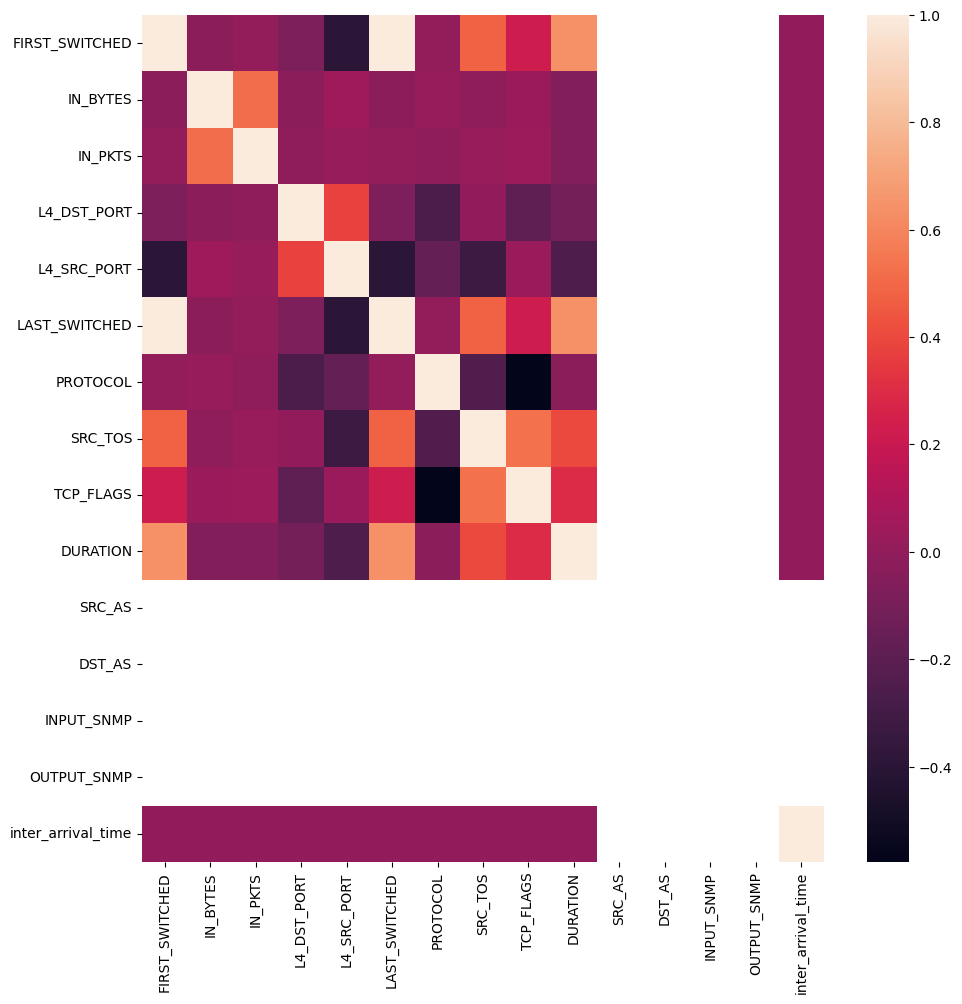

In [12]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [13]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [14]:
corr_features = correlation(X_train, 0.80)
len(set(corr_features))
corr_features

{'LAST_SWITCHED'}

In [15]:
X_train_fil = X_train.drop(corr_features,axis=1)
X_test_fil = X_test.drop(corr_features,axis=1)

In [16]:
extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(X_train_fil, y_train)
predictions = cls.predict(X_test_fil)
cls.score(X_test_fil, y_test)

0.9891240461819166

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_fil, y_train)
predictions = rfc.predict(X_test_fil)
rfc.score(X_test_fil, y_test)

0.9923847879751202

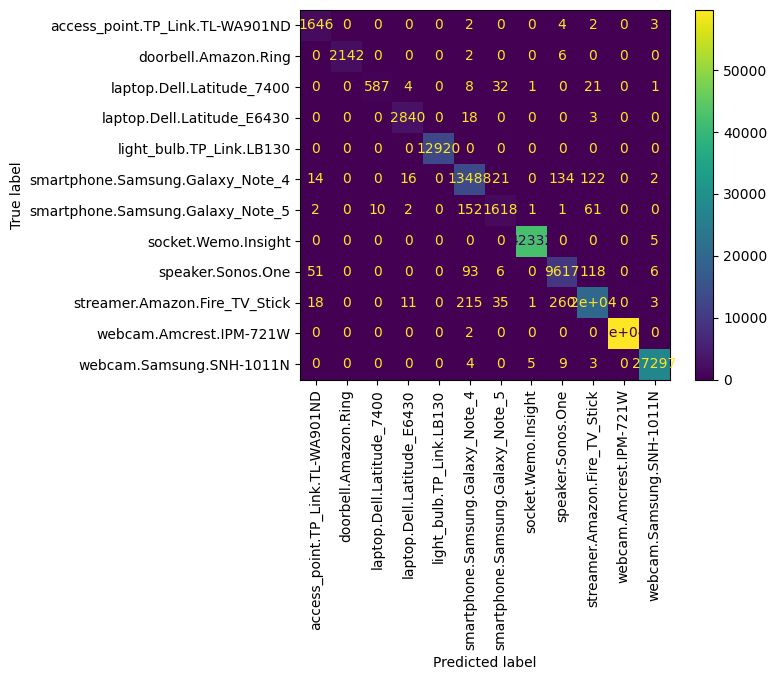

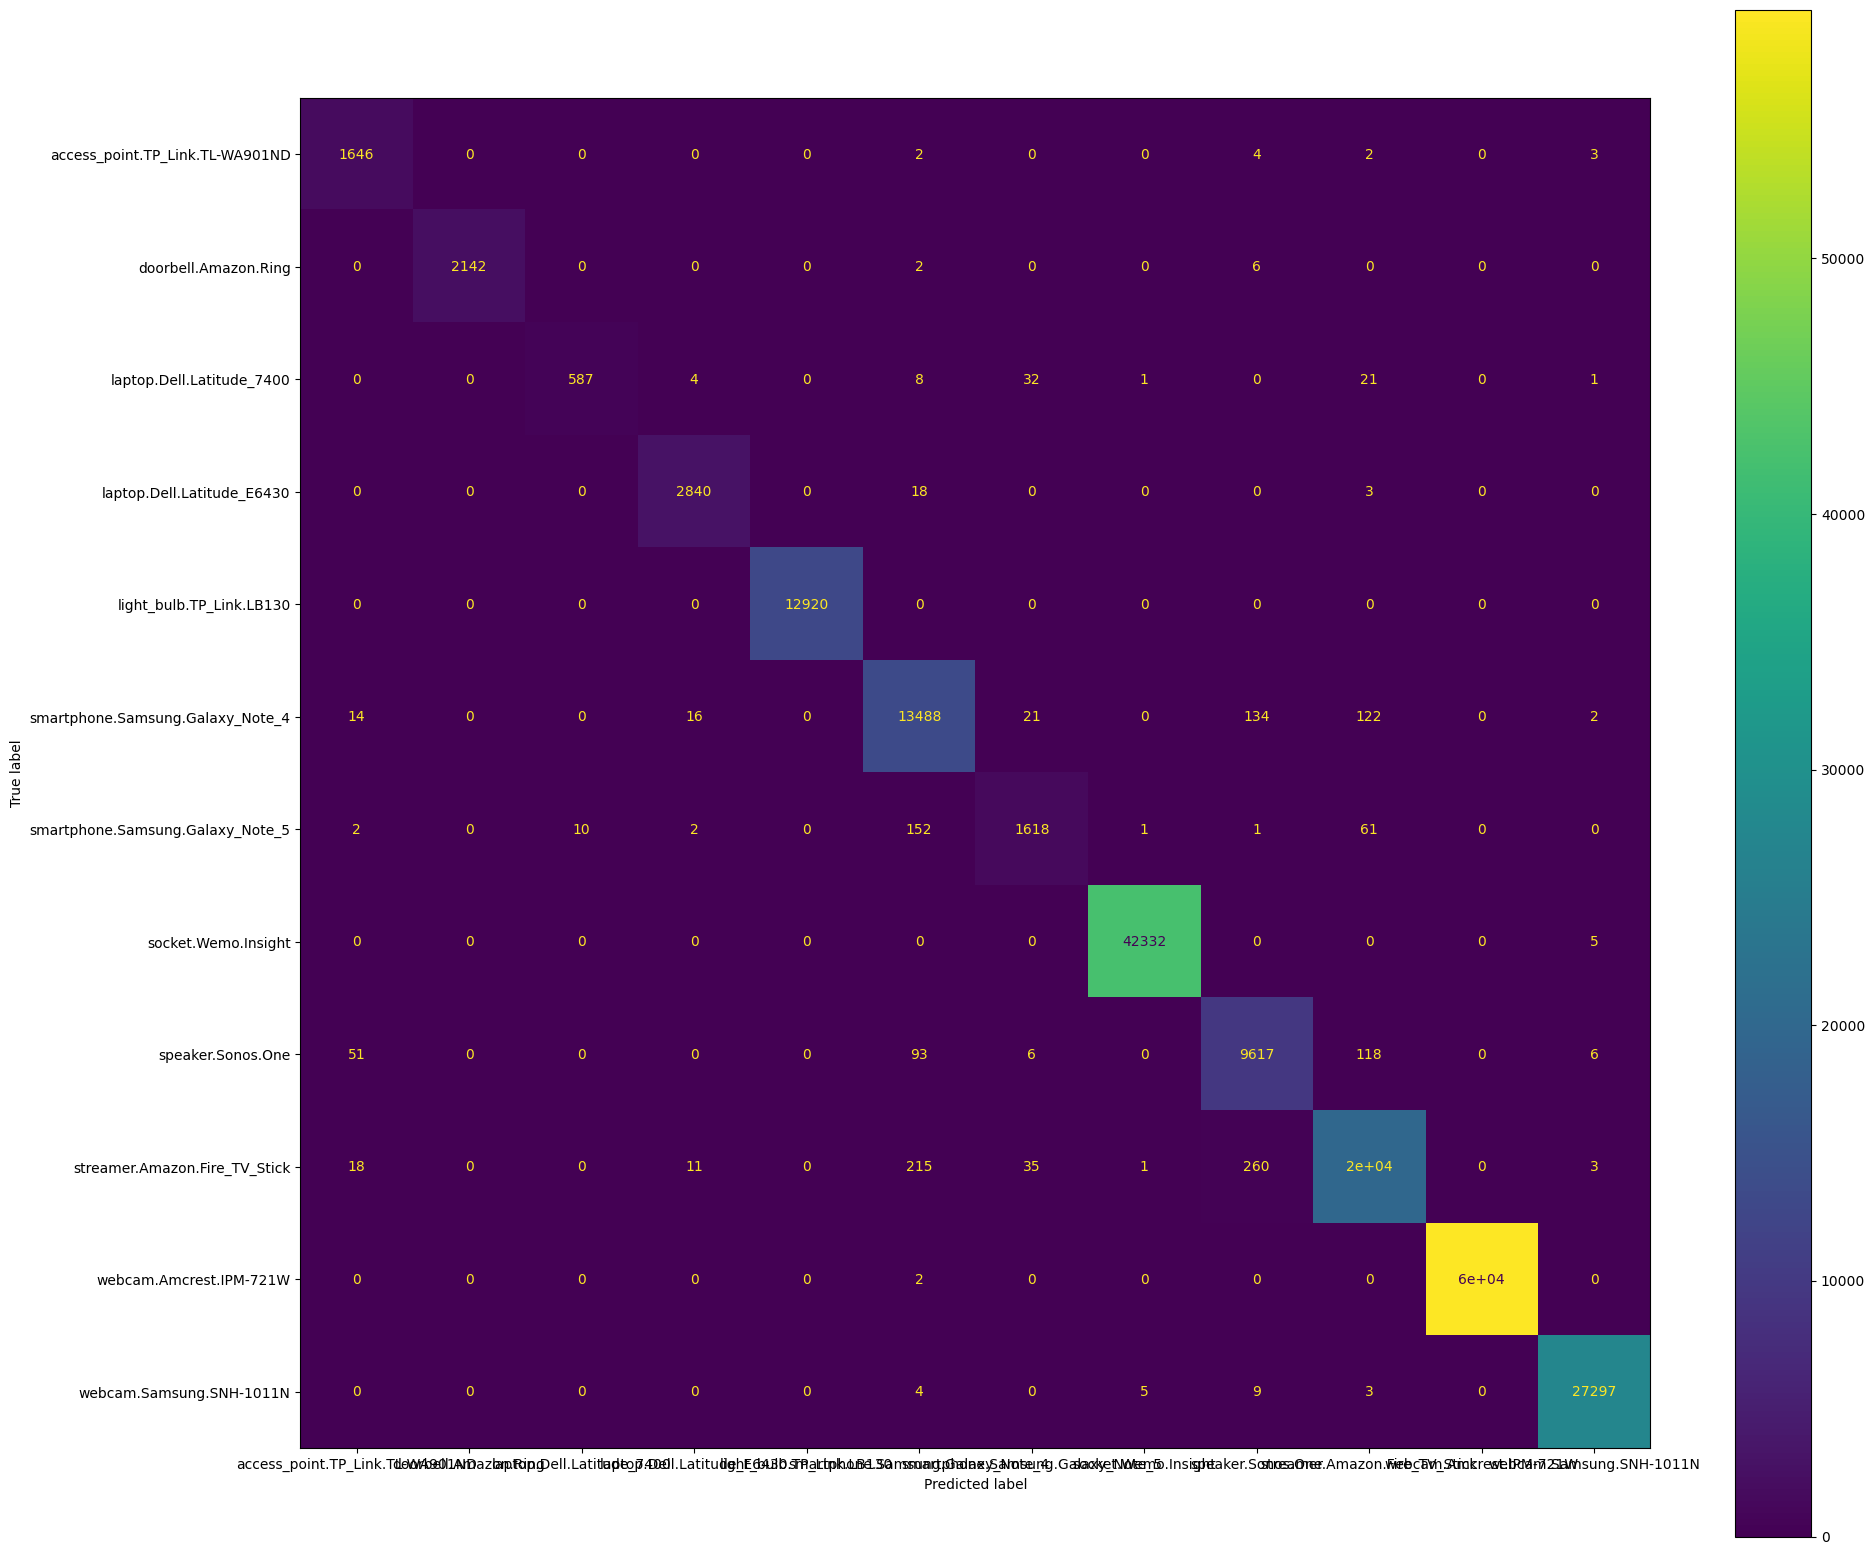

In [18]:
conf_matrix_display = ConfusionMatrixDisplay.from_estimator(rfc, X_test_fil, y_test, display_labels=rfc.classes_, xticks_rotation="vertical")

fig, ax = plt.subplots(figsize=(20, 16))

# Display the confusion matrix
conf_matrix_display.plot(ax=ax)

plt.tight_layout()
plt.show()

In [19]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
"""
precision_score(y_test, y_pred, average='micro') will return the total ratio of tp/(tp + fp)
"""
precision = precision_score(y_test, predictions, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.992385
Precision: 0.992385
Recall: 0.992385
F1 score: 0.992385


#  DEVICE CLASSIFIER INSIDE THE NETWORK

In [20]:
column_types = {'device_model': 'str'}
df_access = pd.read_csv('access_point.csv', dtype=column_types)
df_doorbell = pd.read_csv('doorbell.csv', dtype=column_types)
df_laptop_7400 = pd.read_csv('laptop_7400.csv', dtype=column_types)
df_laptop_e64 = pd.read_csv('laptop_e64.csv', dtype=column_types)
df_lightbulb = pd.read_csv('lightbulb.csv', dtype=column_types)
df_samsung_web = pd.read_csv('samsung_web.csv', dtype=column_types)
df_smartphone_4 = pd.read_csv('smartphone_4.csv', dtype=column_types)
df_smartphone_5 = pd.read_csv('smartphone_5.csv', dtype=column_types)
df_socket = pd.read_csv('socket.csv', dtype=column_types)
df_speaker = pd.read_csv('speaker.csv', dtype=column_types)
df_streamer = pd.read_csv('streamer.csv', dtype=column_types)
df_webcam = pd.read_csv('webcam.csv', dtype=column_types)

df_2 = pd.concat([df_samsung_web, df_access, df_doorbell, df_laptop_7400, df_laptop_e64, df_lightbulb, df_smartphone_4, df_smartphone_5, df_socket, df_speaker, df_streamer, df_webcam], ignore_index=True)

nocolumns = ['IPV4_SRC_ADDR', 'MAC', 'IPV4_DST_ADDR', 'IP', 'partition', 'category', 'type', 'date', 'LAST_SWITCHED', 'FIRST_SWITCHED', 'SRC_TOS', 'SRC_AS', 'DST_AS']

df_2 = df_2.drop(nocolumns, axis=1)
df_2

,IN_BYTES,IN_PKTS,L4_DST_PORT,L4_SRC_PORT,PROTOCOL,TCP_FLAGS,DURATION,device_model,INPUT_SNMP,OUTPUT_SNMP,inter_arrival_time
0,240.0,4.0,5222.0,3696.0,6.0,2.0,4195.0,webcam.Samsung.SNH-1011N,6.0,1.0,1.579048e+09
1,76.0,1.0,123.0,4039.0,17.0,0.0,4216.0,webcam.Samsung.SNH-1011N,6.0,1.0,2.100000e+01
2,120.0,2.0,5222.0,3661.0,6.0,2.0,4213.0,webcam.Samsung.SNH-1011N,6.0,1.0,1.000000e+01
3,76.0,1.0,123.0,4040.0,17.0,0.0,4217.0,webcam.Samsung.SNH-1011N,6.0,1.0,2.000000e+01
4,60.0,1.0,5222.0,3661.0,6.0,2.0,4216.0,webcam.Samsung.SNH-1011N,6.0,1.0,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
782639,1716.0,6.0,8800.0,47219.0,17.0,0.0,4234.0,webcam.Amcrest.IPM-721W,6.0,1.0,9.000000e+00
782640,240.0,4.0,12367.0,35031.0,6.0,2.0,4230.0,webcam.Amcrest.IPM-721W,6.0,1.0,1.100000e+01
782641,1722.0,6.0,8800.0,55222.0,17.0,0.0,4235.0,webcam.Amcrest.IPM-721W,6.0,1.0,1.000000e+00
782642,1239.0,21.0,8800.0,19272.0,17.0,0.0,4191.0,webcam.Amcrest.IPM-721W,6.0,1.0,8.000000e+00


In [21]:
df_2.isnull().sum()

IN_BYTES              0
IN_PKTS               0
L4_DST_PORT           0
L4_SRC_PORT           0
PROTOCOL              0
TCP_FLAGS             0
DURATION              0
device_model          0
INPUT_SNMP            0
OUTPUT_SNMP           0
inter_arrival_time    0
dtype: int64

In [22]:
df_2['device_model'].value_counts()

webcam.Amcrest.IPM-721W             239746
socket.Wemo.Insight                 169801
webcam.Samsung.SNH-1011N            108948
streamer.Amazon.Fire_TV_Stick        81143
smartphone.Samsung.Galaxy_Note_4     55626
light_bulb.TP_Link.LB130             51383
speaker.Sonos.One                    39240
laptop.Dell.Latitude_E6430           11627
doorbell.Amazon.Ring                  8590
smartphone.Samsung.Galaxy_Note_5      7501
access_point.TP_Link.TL-WA901ND       6607
laptop.Dell.Latitude_7400             2432
Name: device_model, dtype: int64

In [23]:
df_2.shape

(782644, 11)

In [24]:
X2 = df_2.drop(columns='device_model', axis=1)
Y2 = df_2['device_model']
Y2

0         webcam.Samsung.SNH-1011N
1         webcam.Samsung.SNH-1011N
2         webcam.Samsung.SNH-1011N
3         webcam.Samsung.SNH-1011N
4         webcam.Samsung.SNH-1011N
                    ...           
782639     webcam.Amcrest.IPM-721W
782640     webcam.Amcrest.IPM-721W
782641     webcam.Amcrest.IPM-721W
782642     webcam.Amcrest.IPM-721W
782643     webcam.Amcrest.IPM-721W
Name: device_model, Length: 782644, dtype: object

In [25]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, random_state=0)
extra_tree = ExtraTreeClassifier(random_state=0)
cls2 = BaggingClassifier(extra_tree, random_state=0).fit(X2_train, y2_train)
predictions2 = cls2.predict(X2_test)
cls2.score(X2_test, y2_test)

0.9860626287303039

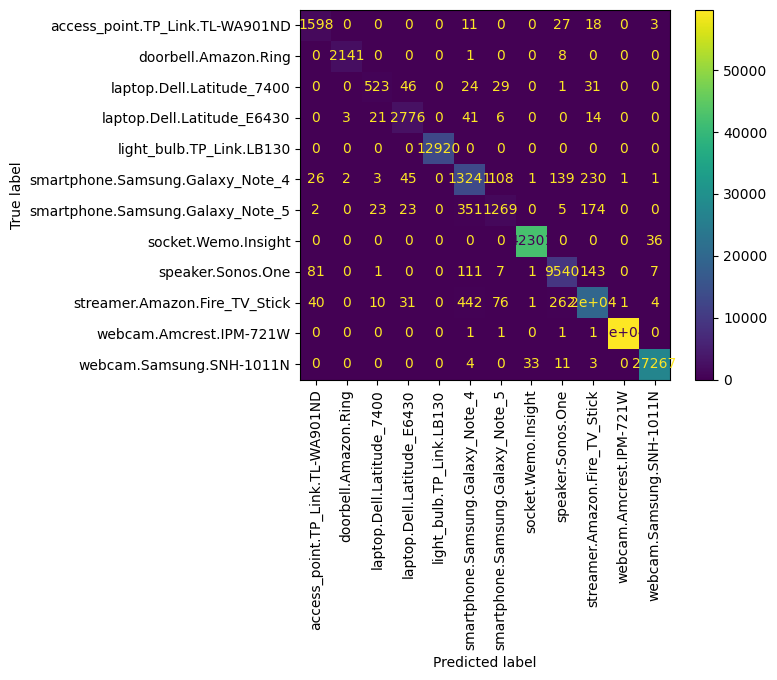

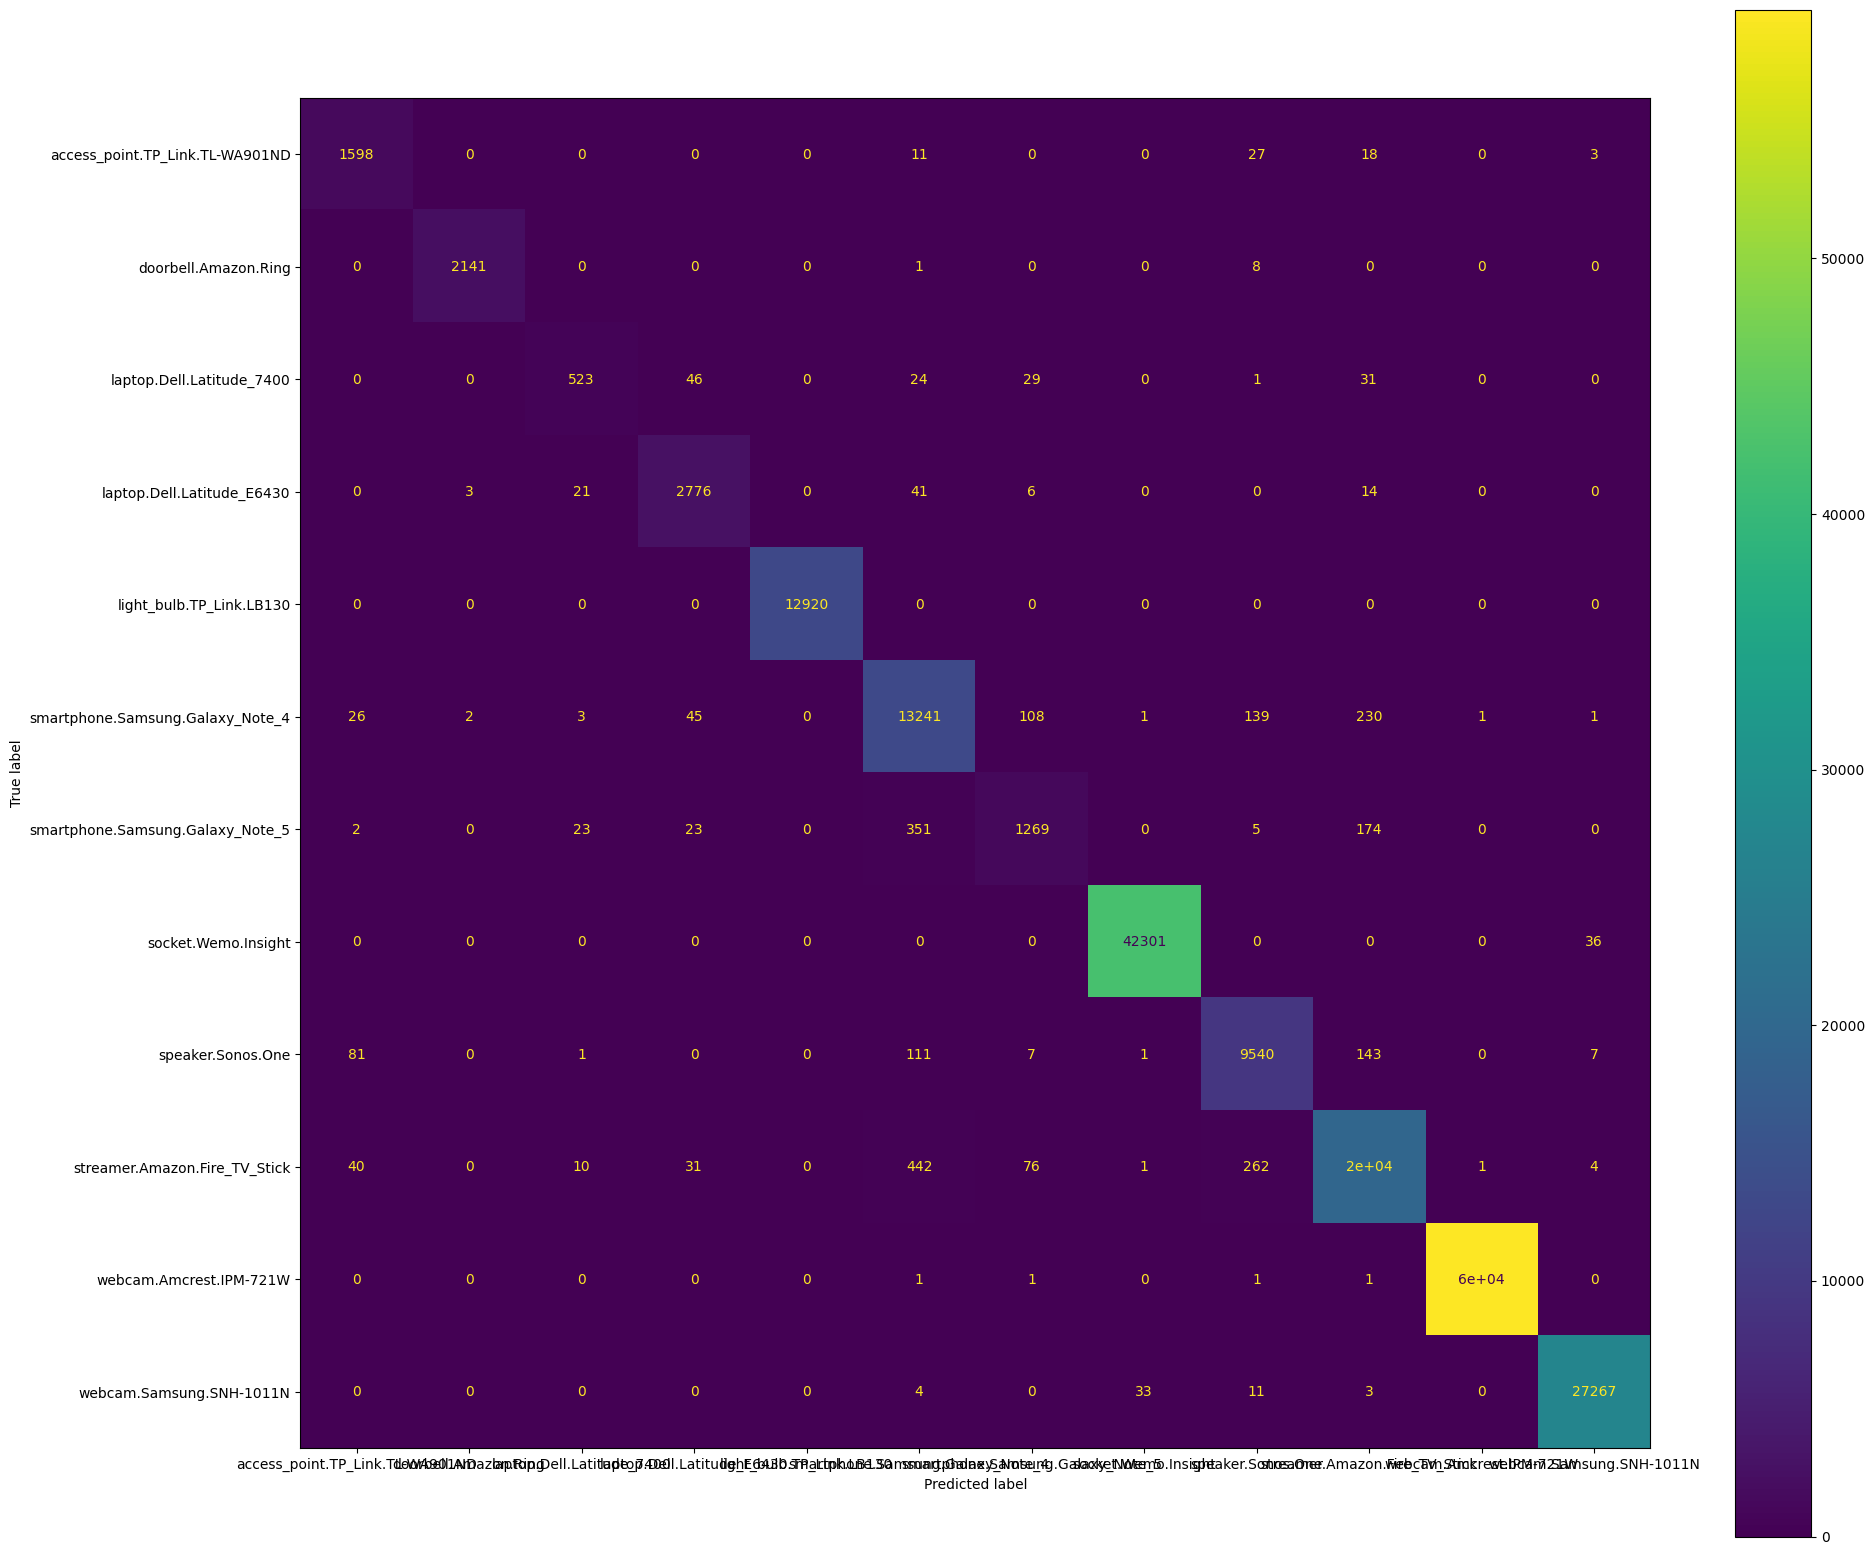

In [26]:
conf_matrix_display = ConfusionMatrixDisplay.from_estimator(cls2, X2_test, y2_test, display_labels=cls2.classes_, xticks_rotation="vertical")

fig, ax = plt.subplots(figsize=(20, 16))

# Display the confusion matrix
conf_matrix_display.plot(ax=ax)

plt.tight_layout()
plt.show()

In [27]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y2_test, predictions2)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
"""
precision_score(y_test, y_pred, average='micro') will return the total ratio of tp/(tp + fp)
"""
precision = precision_score(y2_test, predictions2, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y2_test, predictions2, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y2_test, predictions2, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.986063
Precision: 0.986063
Recall: 0.986063
F1 score: 0.986063


In [28]:
X2_train.corr()

,IN_BYTES,IN_PKTS,L4_DST_PORT,L4_SRC_PORT,PROTOCOL,TCP_FLAGS,DURATION,INPUT_SNMP,OUTPUT_SNMP,inter_arrival_time
IN_BYTES,1.000000,0.514711,-0.017001,0.047926,0.015677,0.030310,-0.055170,NaN,NaN,-0.000255
IN_PKTS,0.514711,1.000000,-0.004672,0.014426,-0.009154,0.033361,-0.055754,NaN,NaN,-0.000158
L4_DST_PORT,-0.017001,-0.004672,1.000000,0.377690,-0.259756,-0.183824,-0.109048,NaN,NaN,-0.000362
L4_SRC_PORT,0.047926,0.014426,0.377690,1.000000,-0.167568,0.030408,-0.252296,NaN,NaN,0.000923
PROTOCOL,0.015677,-0.009154,-0.259756,-0.167568,1.000000,-0.577798,-0.035386,NaN,NaN,-0.000588
TCP_FLAGS,0.030310,0.033361,-0.183824,0.030408,-0.577798,1.000000,0.291349,NaN,NaN,0.001194
DURATION,-0.055170,-0.055754,-0.109048,-0.252296,-0.035386,0.291349,1.000000,NaN,NaN,-0.001611
INPUT_SNMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OUTPUT_SNMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inter_arrival_time,-0.000255,-0.000158,-0.000362,0.000923,-0.000588,0.001194,-0.001611,NaN,NaN,1.000000


<AxesSubplot:>

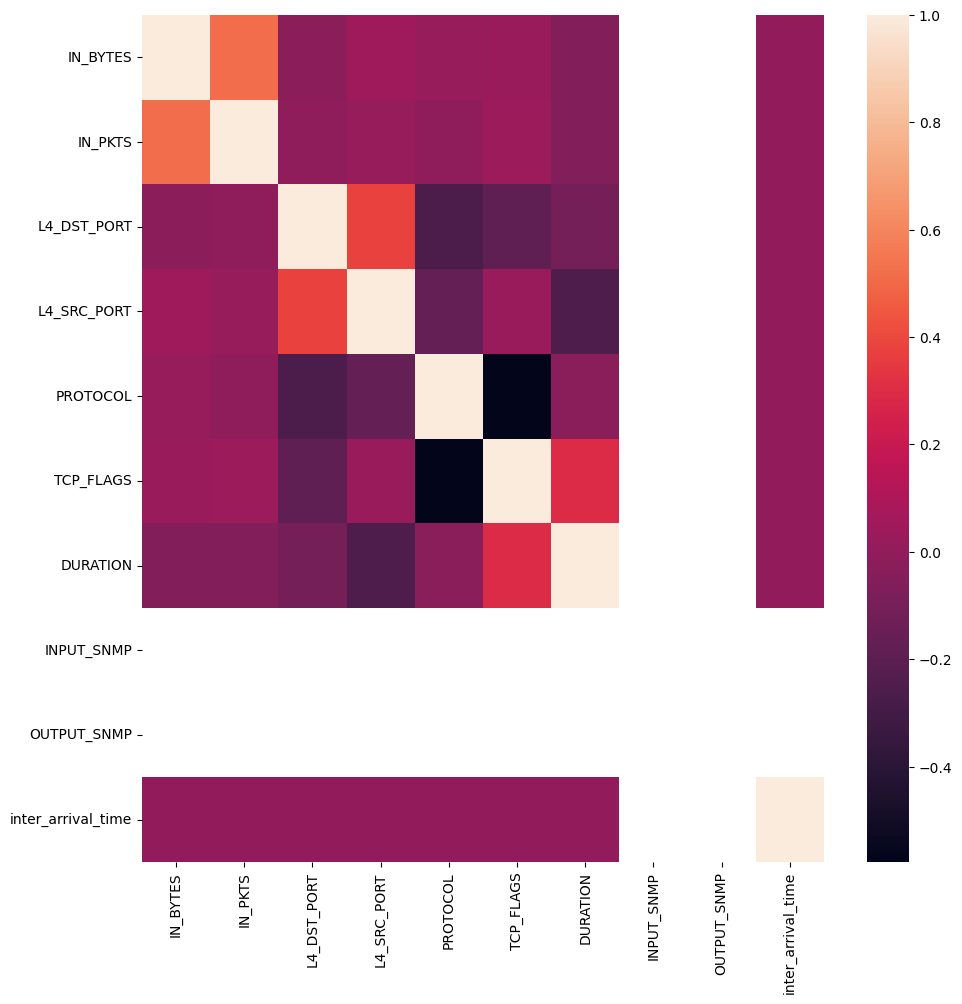

In [29]:
import seaborn as sns
#Using Pearson Correlation
corrmat2 = X2_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat2)

In [30]:
corr_features2 = correlation(X2_train, 0.80)
len(set(corr_features2))
corr_features2

set()

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc2 = RandomForestClassifier(random_state=0)
rfc2.fit(X2_train, y2_train)
predictions_rfc2 = rfc2.predict(X2_test)
rfc2.score(X2_test, y2_test)

0.9885976254848948

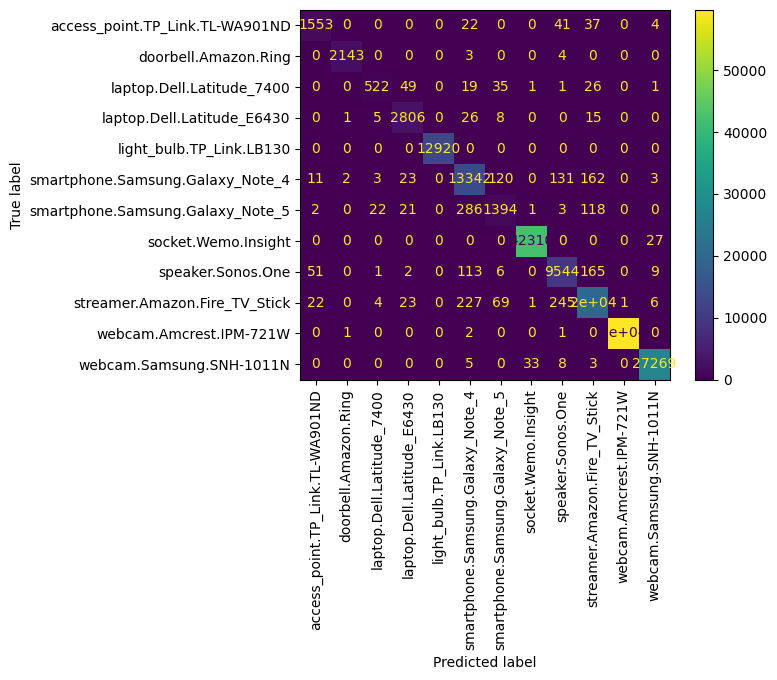

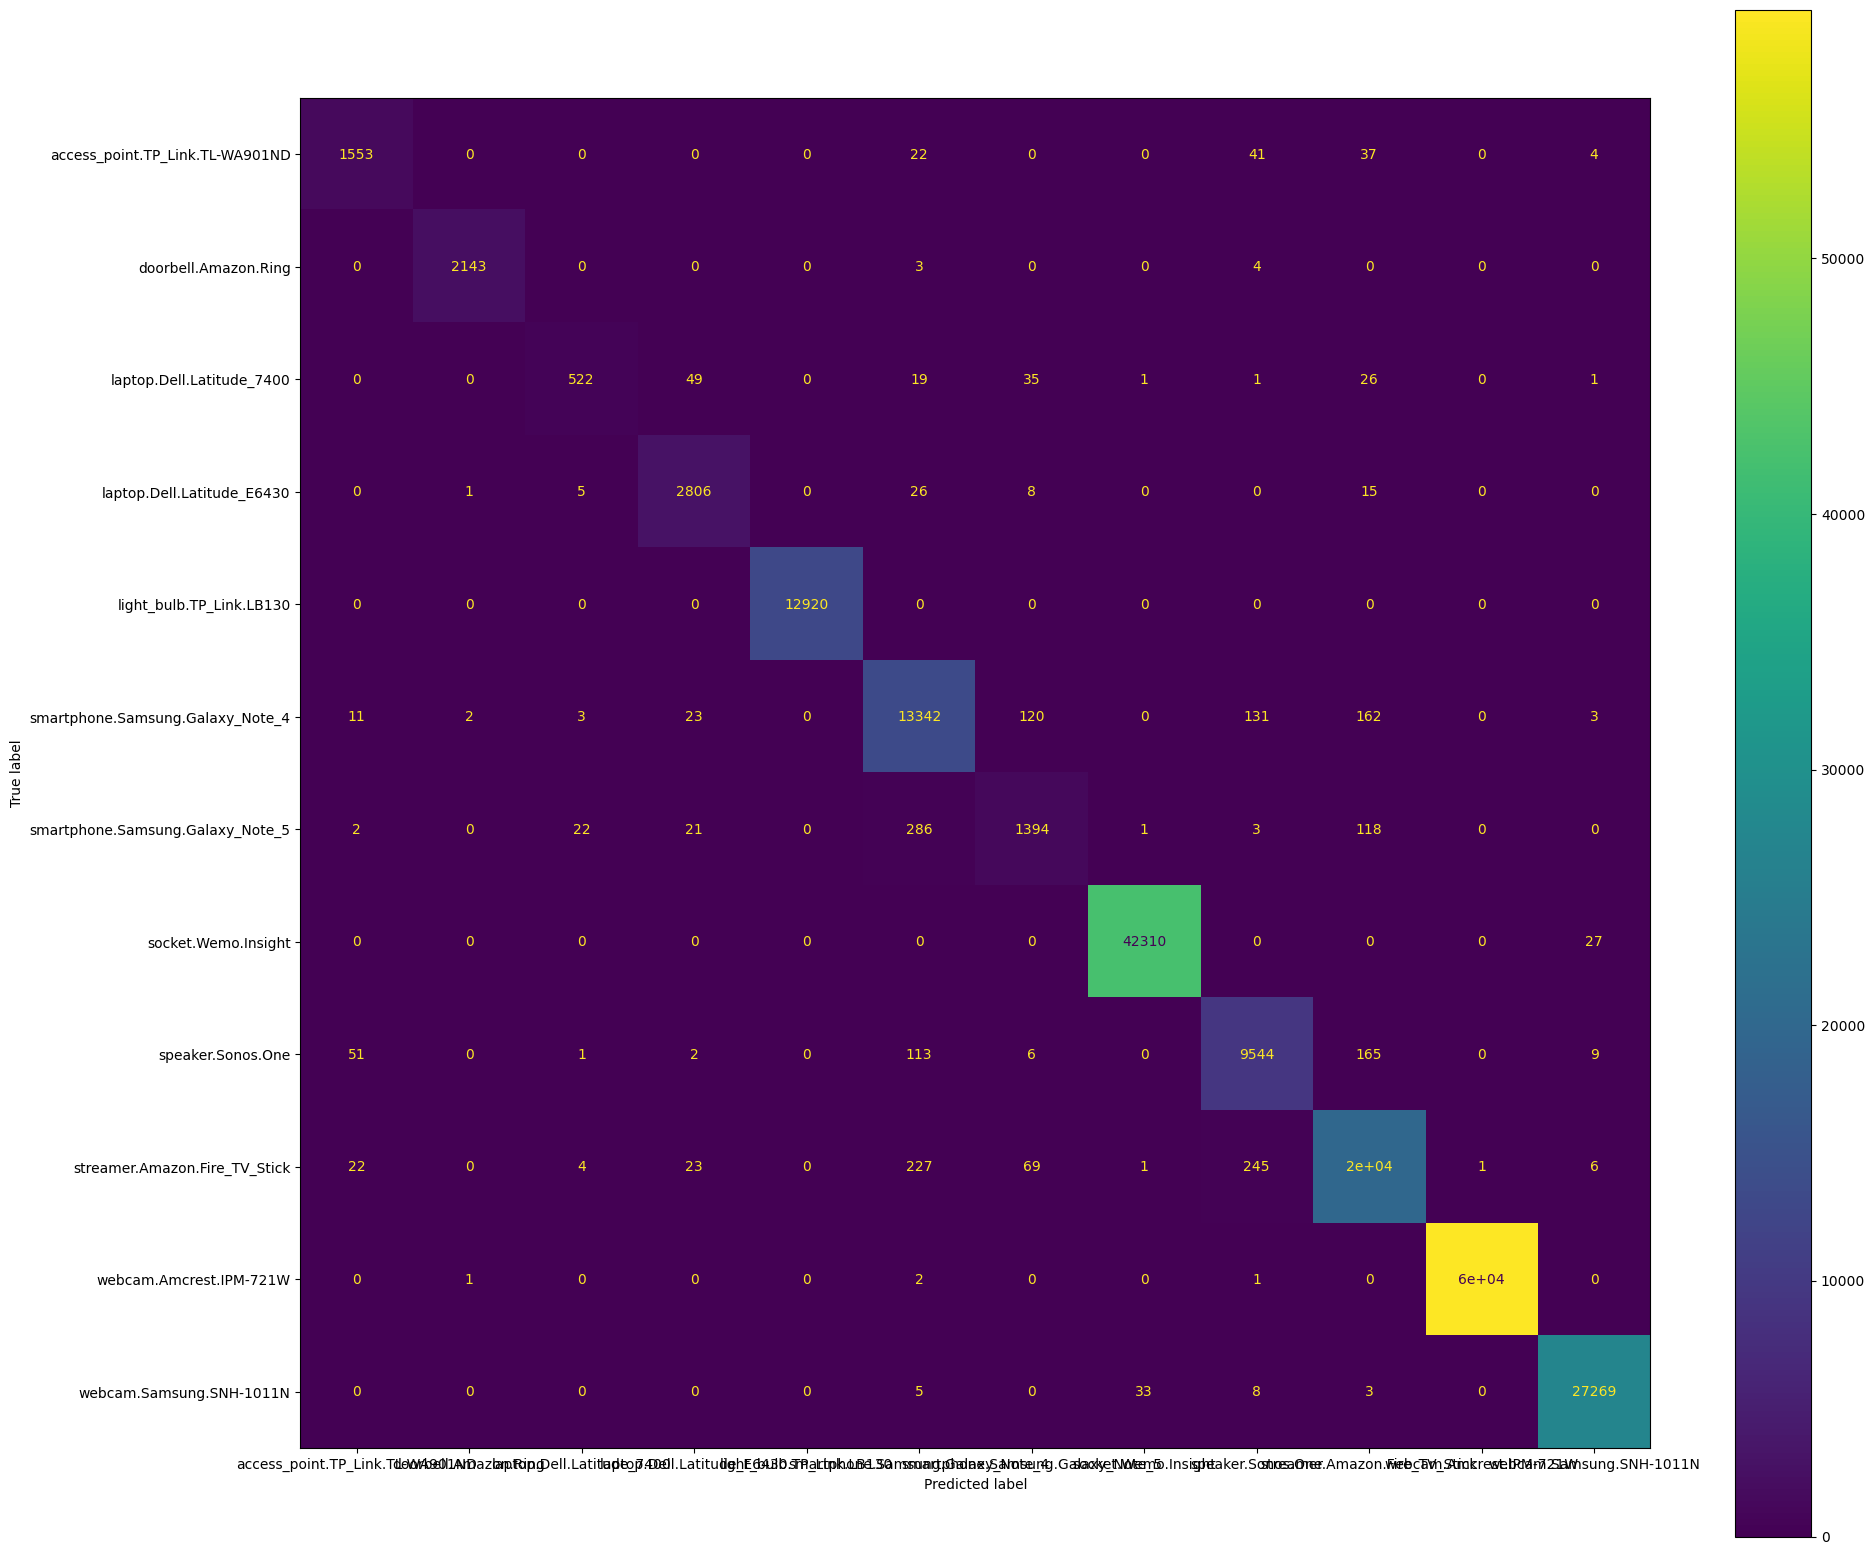

In [32]:
conf_matrix_display = ConfusionMatrixDisplay.from_estimator(rfc2, X2_test, y2_test, display_labels=rfc2.classes_, xticks_rotation="vertical")

fig, ax = plt.subplots(figsize=(20, 16))

# Display the confusion matrix
conf_matrix_display.plot(ax=ax)

plt.tight_layout()
plt.show()

In [33]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y2_test, predictions_rfc2)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)

precision = precision_score(y2_test, predictions_rfc2, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y2_test, predictions_rfc2, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y2_test, predictions_rfc2, average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.988598
Precision: 0.988598
Recall: 0.988598
F1 score: 0.988598
